# 이미지 인식 - CNN
### MNIST

In [2]:
import numpy as np
import tensorflow as tf
# from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import os
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [4]:
# 데이터 불러오기
# 학습데이터 reshape -> 정규화
# Y 정규화
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],28,28,1).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0],28,28,1).astype('float')/255
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [8]:
# 컨볼루션 신경망 설정
model = Sequential([
    Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
                 activation='relu',
                 input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(64, (2, 2), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(1000, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 1000)              3

In [9]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [10]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [11]:
modelpath = MODEL_DIR + "mnist-cnn-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [12]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=30,
                   batch_size=200, 
                   callbacks=[early_stopping_callback, checkpointer])

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
47800/48000 [============================>.] - ETA: 0s - loss: 0.2418 - accuracy: 0.9262
Epoch 00001: val_loss improved from inf to 0.07164, saving model to ./model/mnist-cnn-01-0.0716.hdf5
48000/48000 [==============================] - 21s 441us/sample - loss: 0.2412 - accuracy: 0.9263 - val_loss: 0.0716 - val_accuracy: 0.9798
Epoch 2/30
47800/48000 [============================>.] - ETA: 0s - loss: 0.0682 - accuracy: 0.9785
Epoch 00002: val_loss improved from 0.07164 to 0.04776, saving model to ./model/mnist-cnn-02-0.0478.hdf5
48000/48000 [==============================] - 21s 433us/sample - loss: 0.0681 - accuracy: 0.9785 - val_loss: 0.0478 - val_accuracy: 0.9864
Epoch 3/30
47800/48000 [============================>.] - ETA: 0s - loss: 0.0519 - accuracy: 0.9832
Epoch 00003: val_loss improved from 0.04776 to 0.04267, saving model to ./model/mnist-cnn-03-0.0427.hdf5
48000/48000 [==============================] - 21s 432us/sa

In [14]:
from tensorflow.keras.models import load_model
del model
model =load_model('./model/mnist-cnn-11-0.0253.hdf5')

In [15]:
# 테스트 정확도 출력 
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test, verbose=0)[1]))


 Test Accuracy: 0.9924


In [16]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

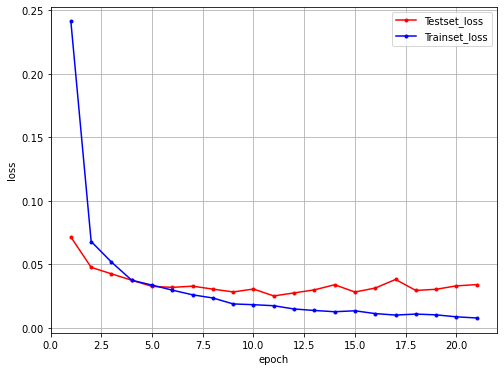

In [17]:
# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()